# Assignment 2
* Matteo Facchetti - 3005019
* Mario Damiano Russo - 3000437
* Mirko Frigerio - 3006305
## Exercise 1
Perform a PCA, analysing the meaning of the first two principal components using the "circle of correlarions".

In [3]:
%cd "/Users/mario/Documents/GitHub/ProbabilityAndStatistics/Assignment_2"

/Users/mario/Documents/GitHub/ProbabilityAndStatistics/Assignment_2


In [4]:
import seaborn as sns
sns.set()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
wine_properties = pd.read_csv("wines_properties.csv")
print(type(wine_properties.shape[1]))
wine_properties.head()

<class 'int'>


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [6]:
wine_properties = wine_properties.iloc[:, :-1]
wine_properties.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [7]:
from sklearn.decomposition import PCA

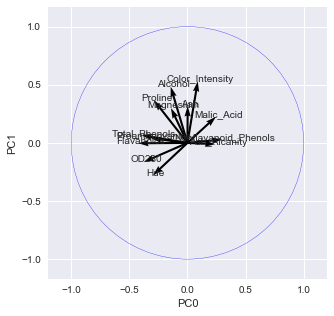

In [8]:
# Standardization
from sklearn.preprocessing import StandardScaler
wine_properties_s = StandardScaler().fit_transform(wine_properties)

#Compute covariance matrix and its eigenvalues
cov_matrix = pd.DataFrame(np.cov(wine_properties_s, rowvar = False))
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

#pair eigenvalues and eigenvectors and sort the based on eigenvalues
eigen_vecs_vals = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) 
                        for i in range(len(eig_vals)) ]
eigen_vecs_vals.sort()
eigen_vecs_vals.reverse()

#use the two largest obtained PCs to compute the correlation circle
PCs2 = np.array([eigen_vecs_vals[0][1], eigen_vecs_vals[1][1]])
PCs2
Y = wine_properties_s.dot(PCs2.T)

# Generate the basic plot
fig = plt.figure(figsize = (5, 5))
plt.quiver(np.zeros(PCs2.shape[1]), np.zeros(PCs2.shape[1]),
           PCs2[0,:], PCs2[1,:],
           angles='xy', scale_units='xy', scale=1)

# Add labels
circle_names = [wine_properties.columns[i] for i in range(PCs2.shape[1])]
for i, j, z in zip(PCs2[1,:]+0.02, PCs2[0,:]+0.02, circle_names):
    plt.text(j, i, z, ha='center', va='center')
    
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])

# Label axes
plt.xlabel('PC0')
plt.ylabel('PC1')

# Done
plt.show()

The correlation circle shows the relationship between clusters. Positively correlated variables are grouped together and point in the same direction. We can se for example that variables Hue and OD280 are positively correlated. Negatively correlated variables are positioned on opposite sides of the plot origin, that is, on opposed quadrants - in our case, variables Flavanoids and Ash_Alcanity are negatively correlated. Lastly, unc orrelated variables are orthogonal to eachother; good examples are Alcohol and OD280, or Hue and Proline.

## Exercise 2
Use a hierarchical cluster algorithm to guess a likely number of clusters present in the data

In [9]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [10]:
from scipy.cluster.hierarchy import linkage

In [11]:
from scipy.cluster.hierarchy import dendrogram

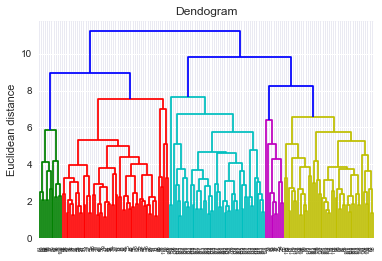

In [12]:
dendogram = dendrogram(linkage(wine_properties_s, method='complete', metric='euclidean'))
plt.title('Dendogram')
plt.ylabel('Euclidean distance');

We think that 3 is a plausible number of cluster.
## Exercise 3
Use the previous number of cluster to perform a K-means cluster analysis

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
wine_properties_s = StandardScaler().fit_transform(wine_properties)

In [14]:
km = KMeans(n_clusters = 3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-4)

In [15]:
wine_km = km.fit_predict(Y)
wine_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

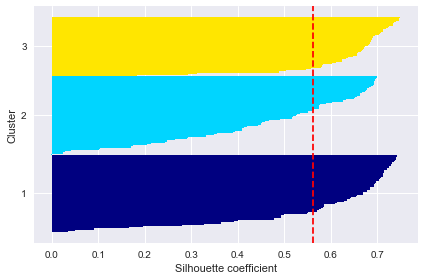

In [16]:
# Silhouette of the clusters

from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(wine_km)
n_clusters = cluster_labels.shape[0]

#silhouette_vals = silhouette_samples(wine_properties_s, wine_km, metric='euclidean')
silhouette_vals = silhouette_samples(Y, wine_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[wine_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters. We can see that the average coefficient is between 0.5 and 0.6, which means that our objects match pretty well to their cluster. This means that 3 is a good number of clusters.

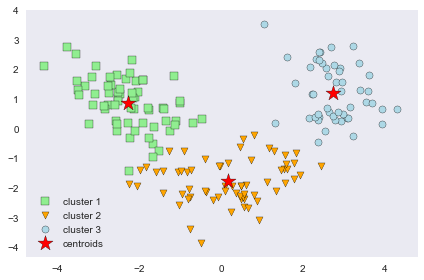

In [17]:
# Cluster 1
plt.scatter(Y[wine_km == 0, 0],
           Y[wine_km == 0, 1],
           s = 50, c="lightgreen",
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')

# Cluster 2
plt.scatter(Y[wine_km == 1, 0],
           Y[wine_km == 1, 1],
           s = 50, c='orange',
           marker = 'v', edgecolor = 'black',
           label = 'cluster 2')

# Cluster 3
plt.scatter(Y[wine_km == 2, 0],
           Y[wine_km == 2, 1],
           s = 50, c='lightblue',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 3')

# Centroids
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, marker='*',
           c='red', edgecolor='black',
           label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

This plot confirms that our clusterization works properly: we can see three pretty well separated clusters.

# Exercise 4

In [18]:
def kmns(df):
    from sklearn.metrics import silhouette_samples
    from matplotlib import cm
    averages = []
    from sklearn.preprocessing import StandardScaler
    df_s = StandardScaler().fit_transform(df)
    
    #Compute covariance matrix and its eigenvalues
    cov_matrix = pd.DataFrame(np.cov(df_s, rowvar = False))
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

    #pair eigenvalues and eigenvectors and sort the based on eigenvalues
    eigen_vecs_vals = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) 
                            for i in range(len(eig_vals)) ]
    eigen_vecs_vals.sort()
    eigen_vecs_vals.reverse()

    #use the two largest obtained PCs to compute the correlation circle
    PCs2 = np.array([eigen_vecs_vals[0][1], eigen_vecs_vals[1][1]])
    PCs2
    Y = df_s.dot(PCs2.T)
    
    # Create a list of silhouette averages
    for i in range(2, df.shape[1]):
        km = KMeans(n_clusters = i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-4)
        data_km = km.fit_predict(Y)
        cluster_labels = np.unique(data_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(df_s, data_km, metric='euclidean')
        silhouette_avg = np.mean(silhouette_vals)
        averages.append(silhouette_avg)
    
    # The value of K is the value that maximizes the silhouette averages
    knumber = averages.index(max(averages)) + 2
    print("Value of K: {0}".format(knumber))
    
    # Plotting the clusters
    keymeans = KMeans(n_clusters = knumber)
    y_km = keymeans.fit_predict(Y)
    for i in range(knumber):
        plt.scatter(Y[y_km == i, 0], Y[y_km == i, 1],
                   s=50, edgecolor="black", label="cluster {0}".format(i+1))
    plt.scatter(keymeans.cluster_centers_[:, 0], keymeans.cluster_centers_[:, 1],
               s=250, marker='*', c='red', edgecolor='black', label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()

Value of K: 3


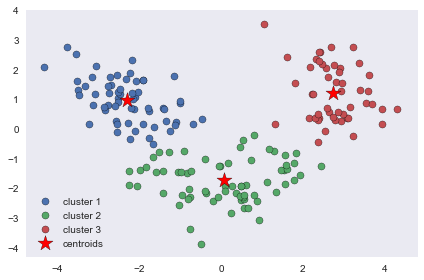

In [19]:
kmns(wine_properties)

## Exercise 5

In [20]:
def function(df):
    df_s = pd.DataFrame(StandardScaler().fit_transform(df))
    
    #Compute covariance matrix and its eigenvalues
    cov_matrix = pd.DataFrame(np.cov(df_s, rowvar = False))
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

    #pair eigenvalues and eigenvectors and sort the based on eigenvalues
    eigen_vecs_vals = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) 
                            for i in range(len(eig_vals)) ]
    eigen_vecs_vals.sort()
    eigen_vecs_vals.reverse()

    #use the two largest obtained PCs to compute the correlation circle
    for h in range(len(eigen_vecs_vals)):
        for e in range(len(eigen_vecs_vals)):
            if h == e:
                continue
            else:
                PCs = np.array([eigen_vecs_vals[h][1], eigen_vecs_vals[e][1]])
                PCs

                # Generate the basic plot
                fig = plt.figure(figsize = (5, 5))
                plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
                           PCs[0,:], PCs[1,:],
                           angles='xy', scale_units='xy', scale=1)

                # Add labels
                circle_names = [df.columns[i] for i in range(PCs.shape[1])]
                for i, j, z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, circle_names):
                    plt.text(j, i, z, ha='center', va='center')

                # Add unit circle
                circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
                plt.gca().add_artist(circle)

                # Ensure correct aspect ratio and axis limits
                plt.axis('equal')
                plt.xlim([-1.2,1.2])
                plt.ylim([-1.2,1.2])

                # Label axes
                plt.xlabel("PC" + str(h))
                plt.ylabel("PC" + str(e))

                # Done
                plt.show()

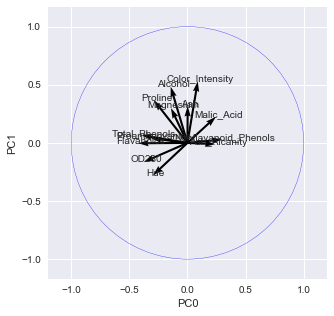

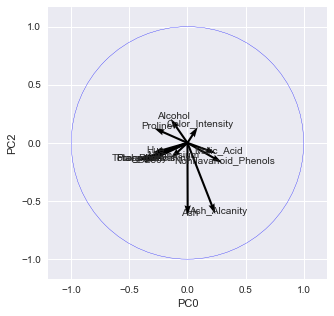

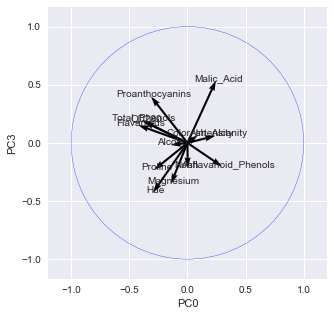

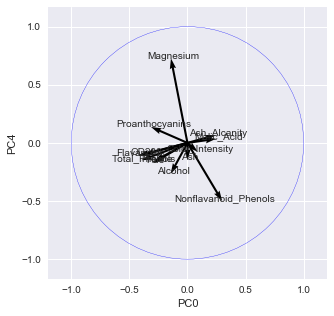

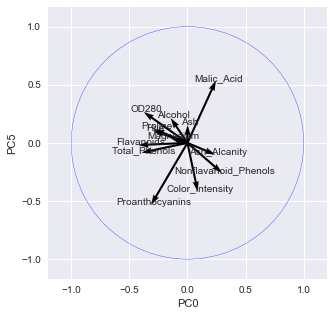

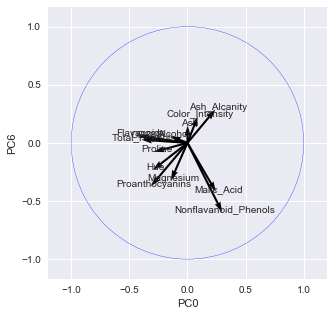

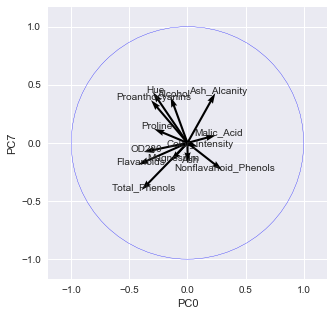

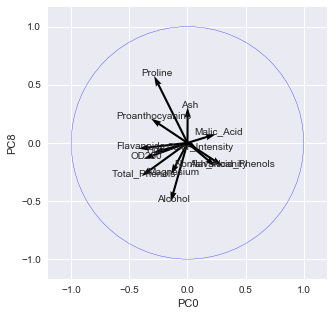

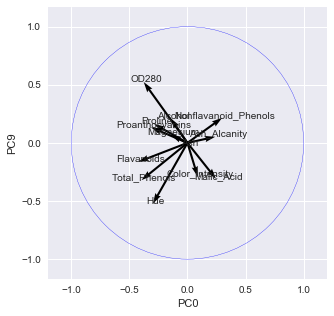

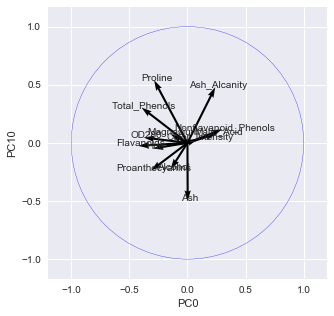

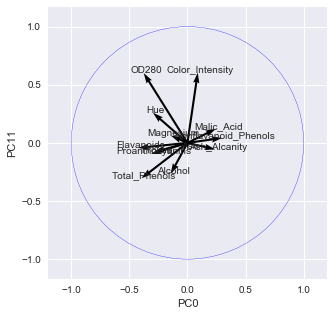

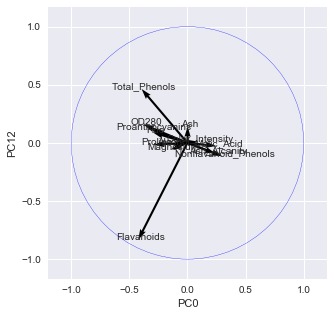

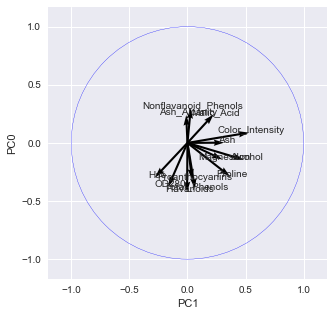

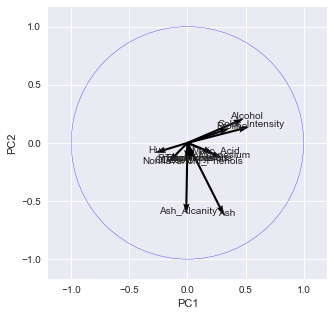

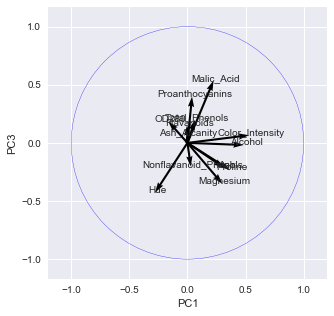

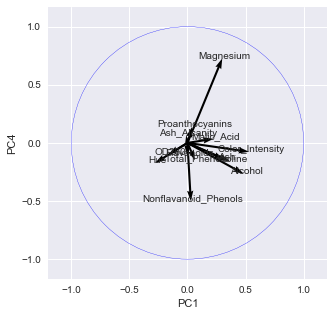

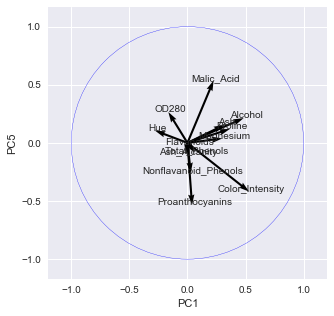

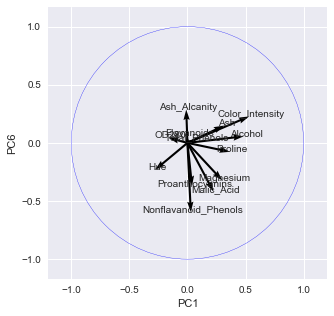

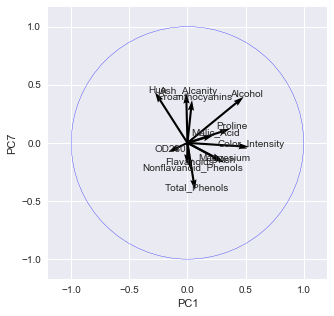

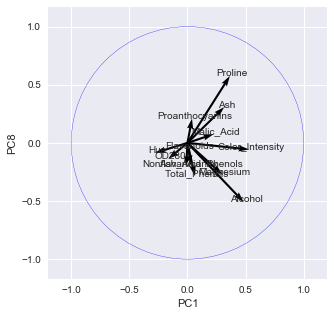

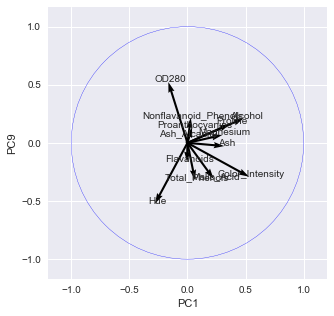

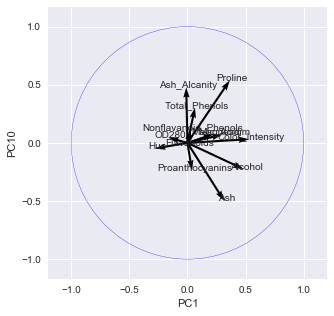

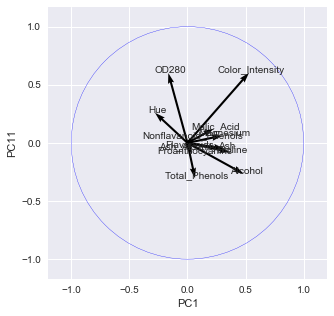

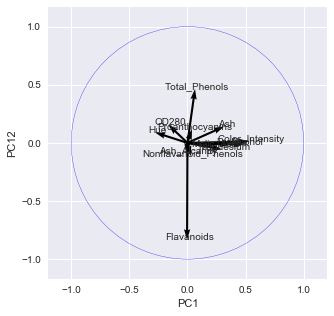

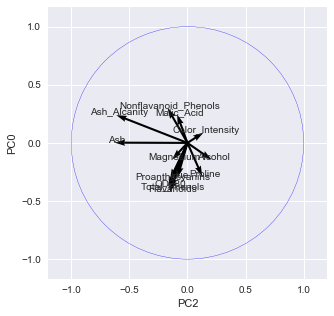

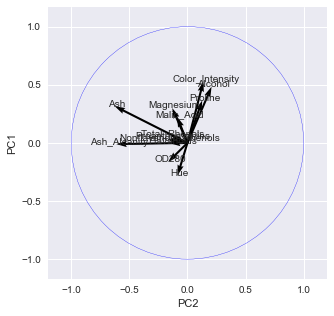

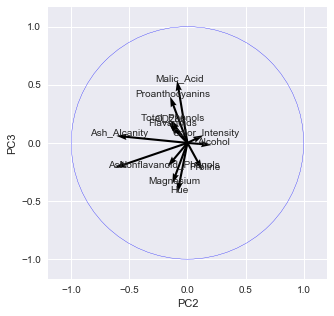

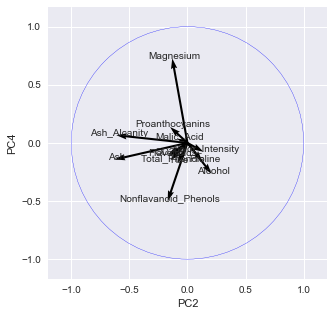

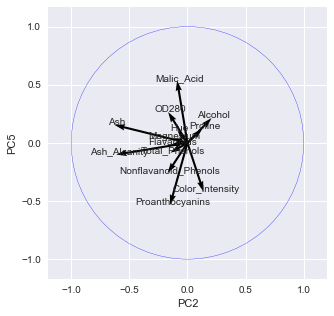

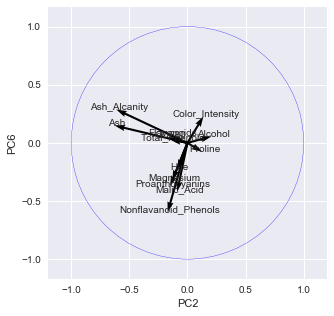

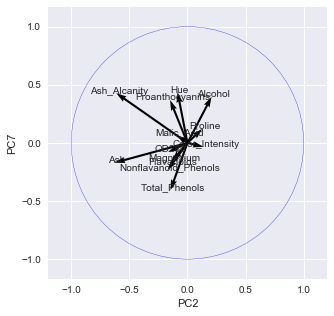

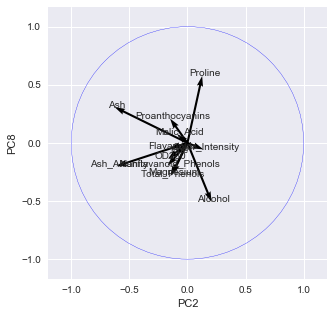

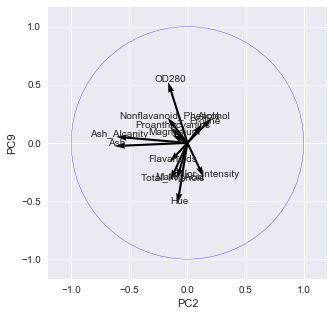

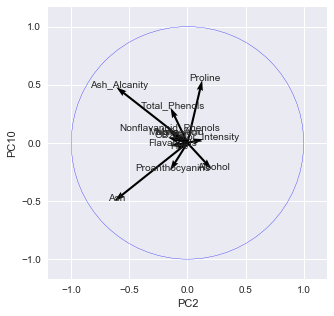

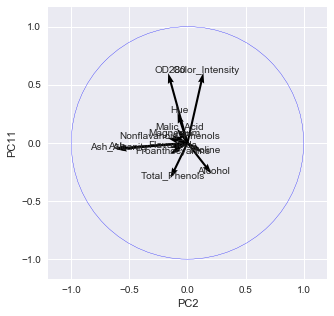

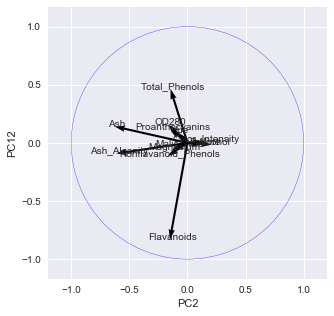

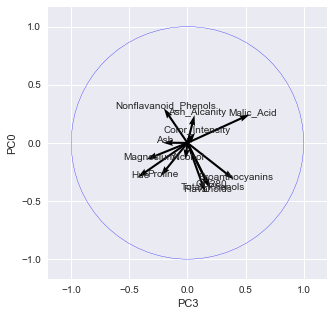

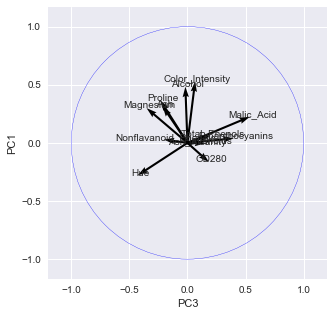

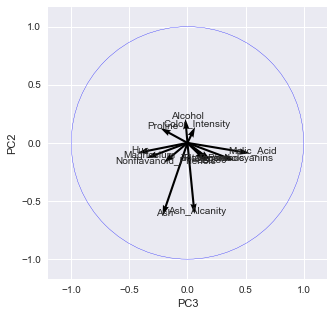

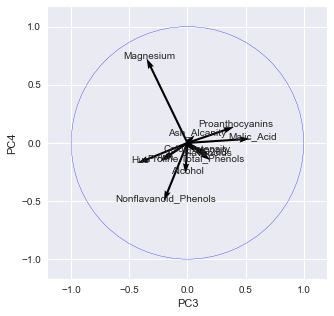

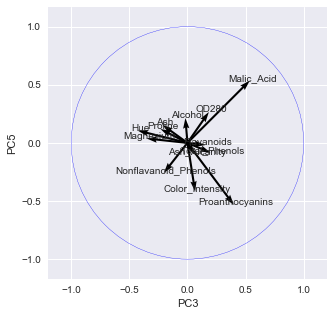

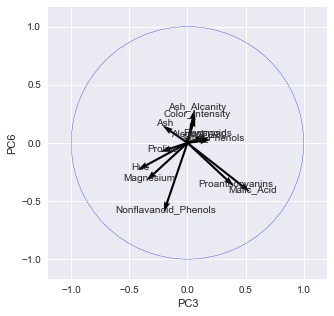

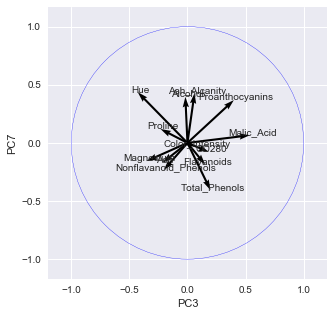

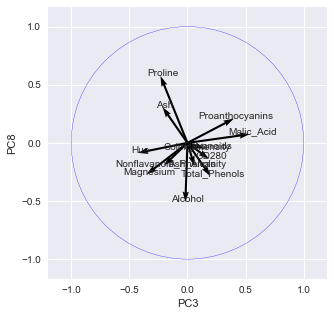

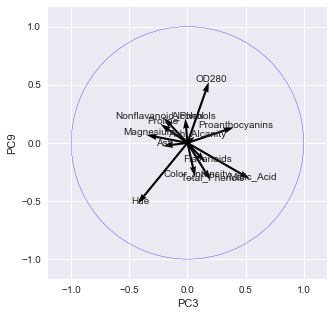

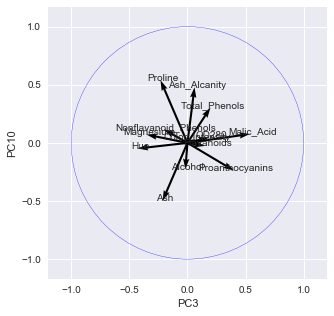

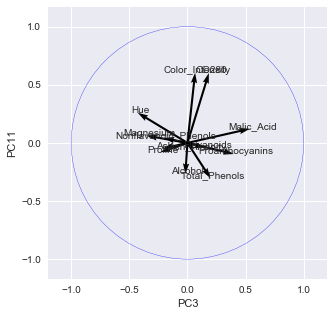

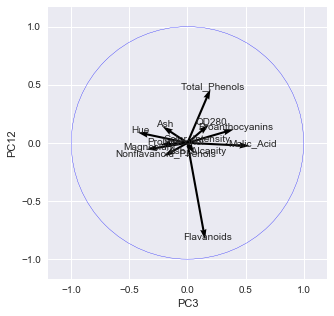

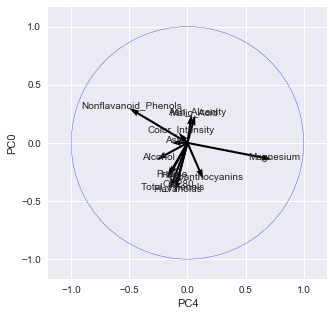

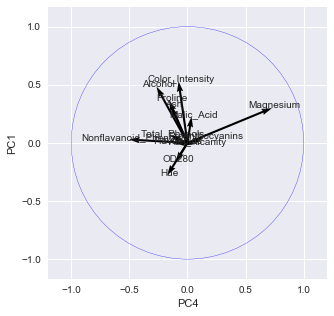

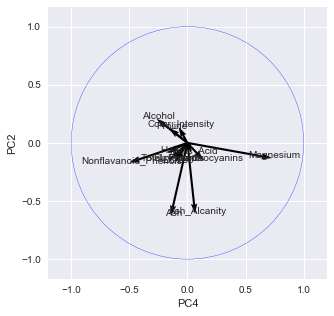

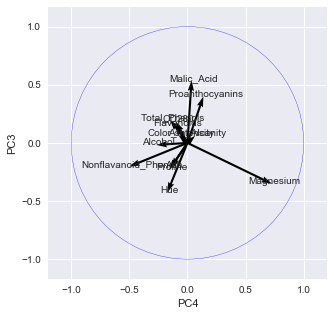

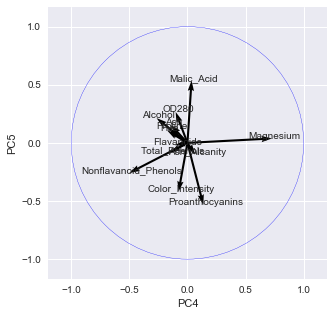

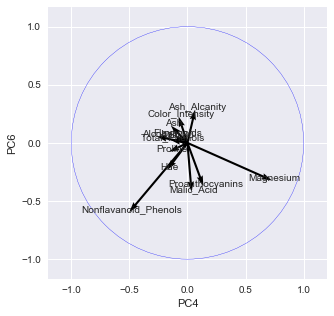

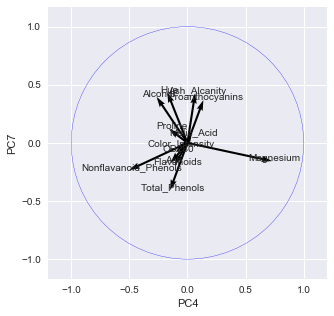

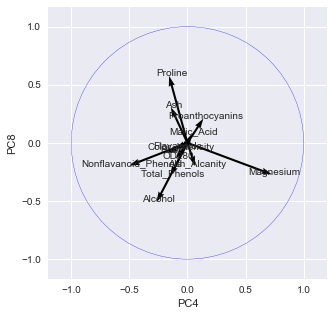

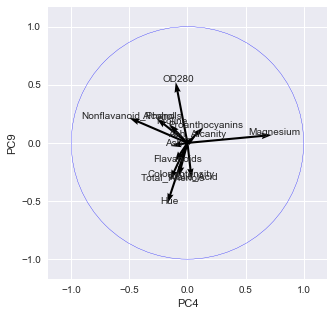

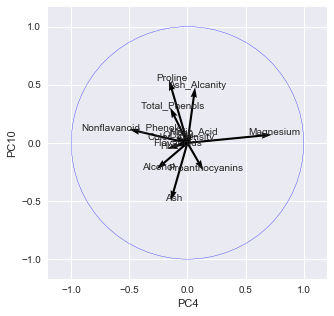

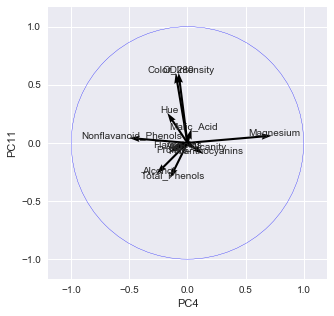

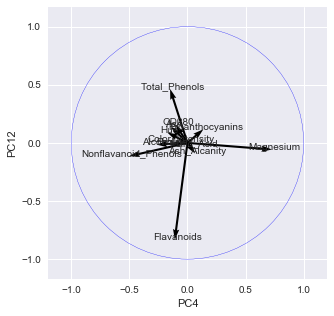

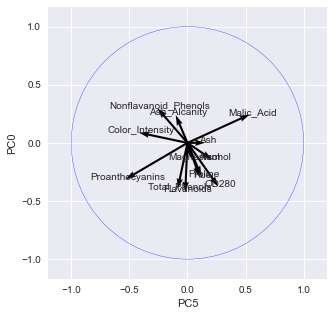

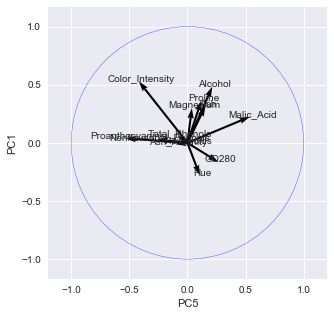

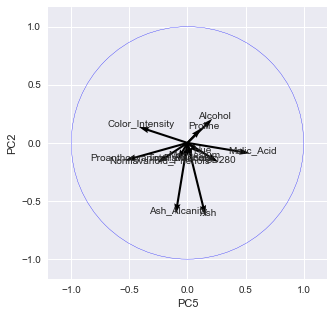

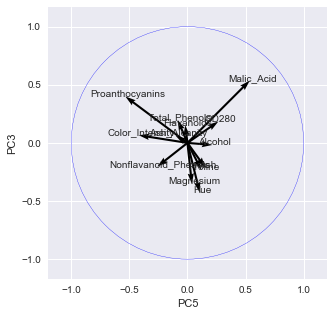

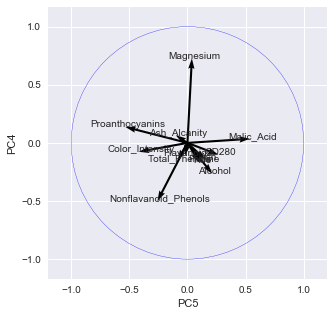

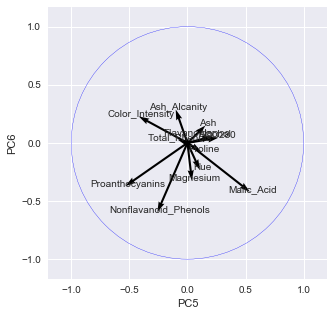

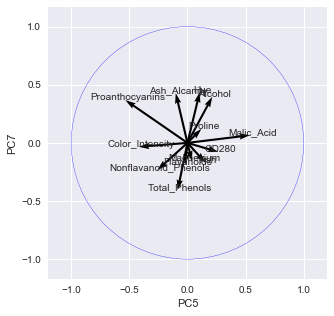

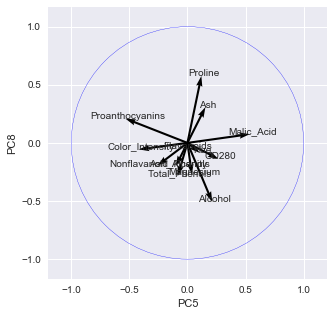

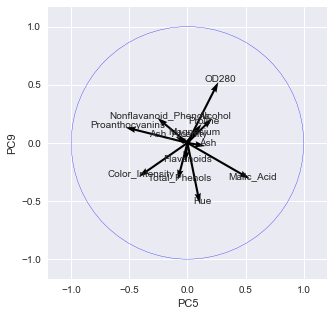

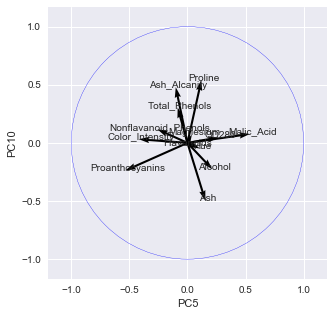

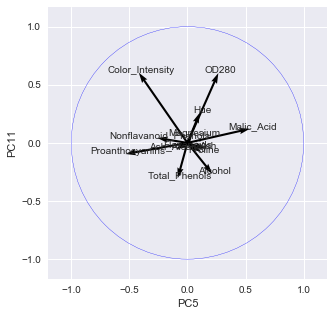

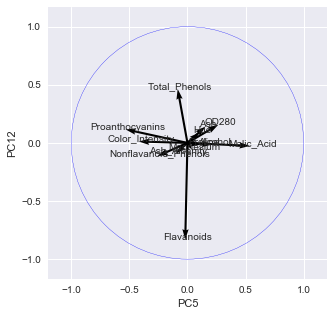

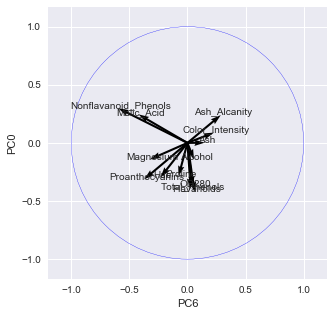

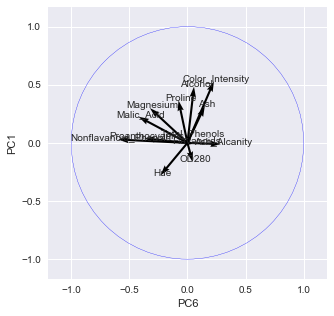

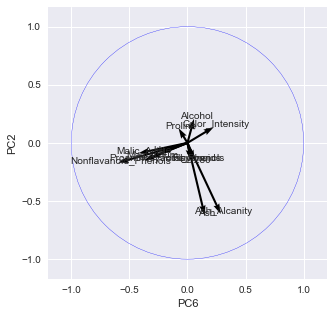

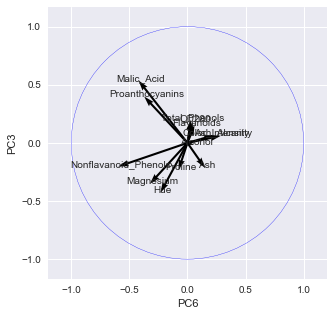

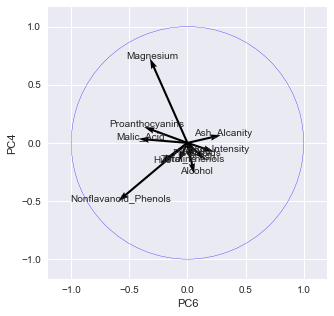

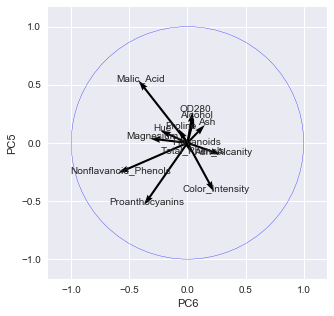

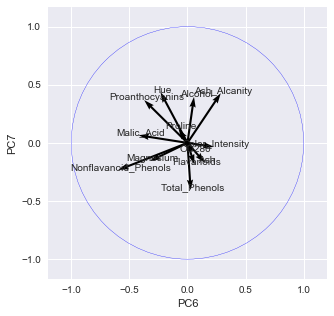

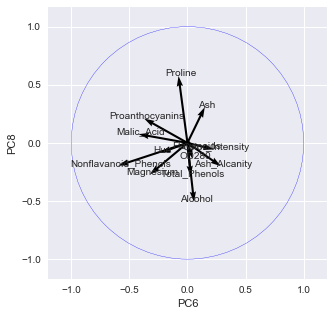

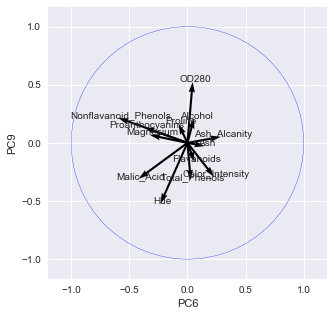

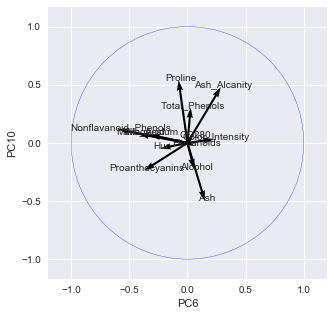

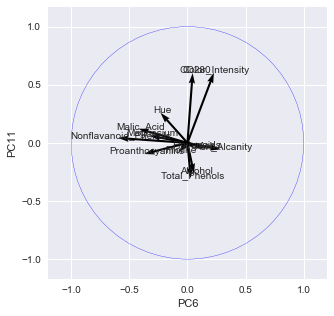

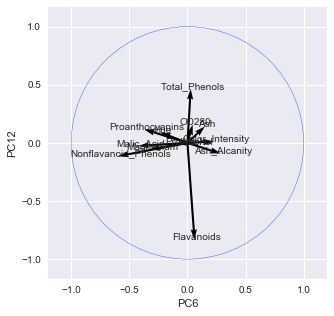

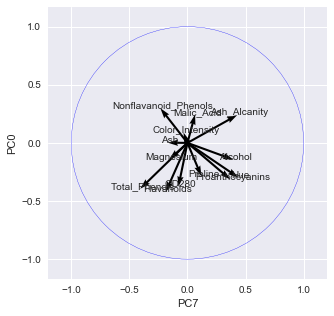

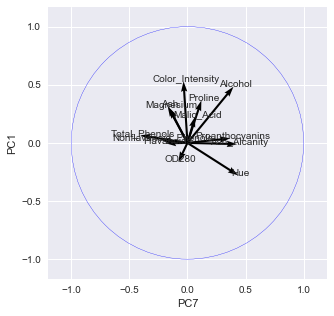

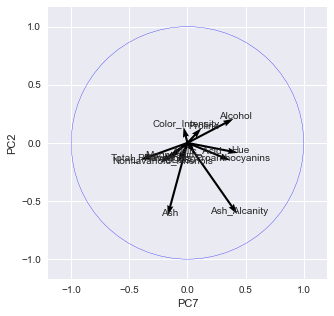

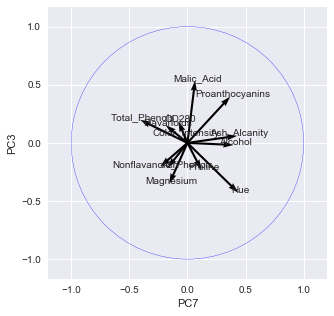

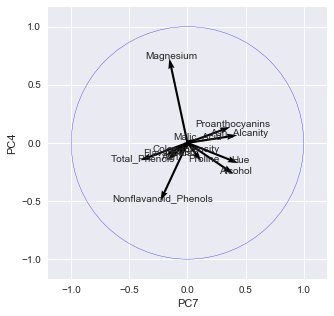

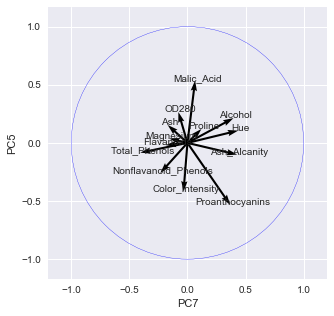

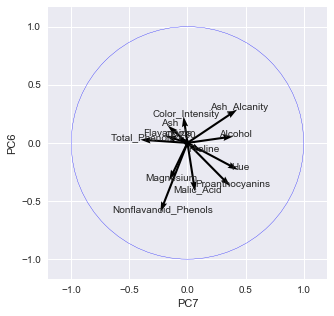

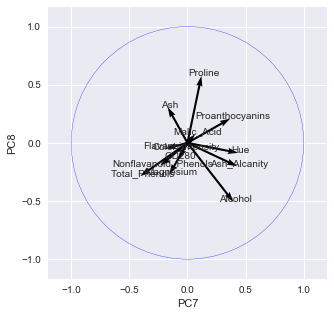

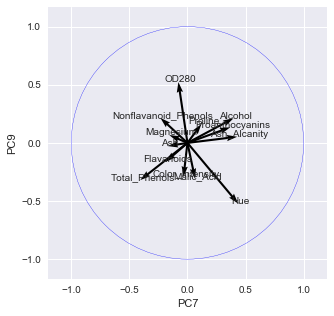

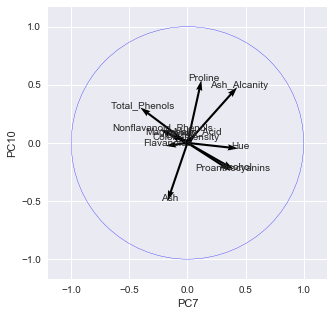

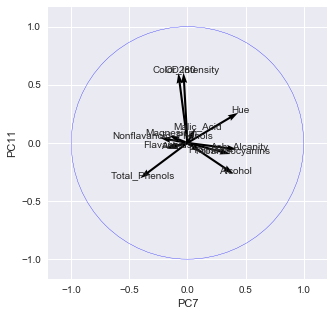

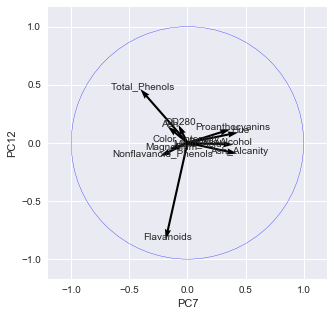

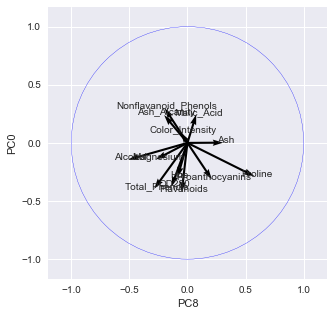

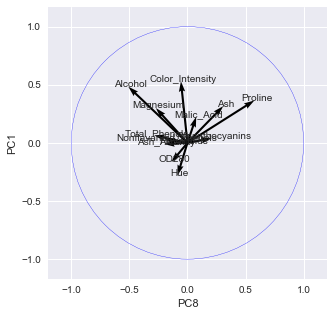

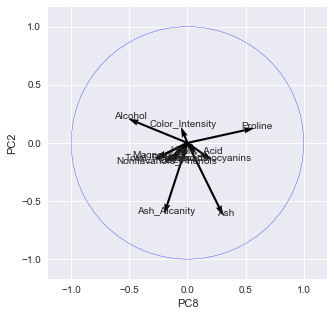

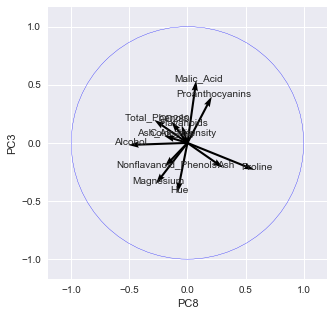

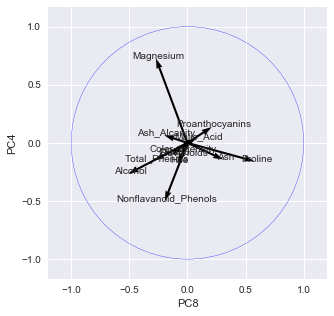

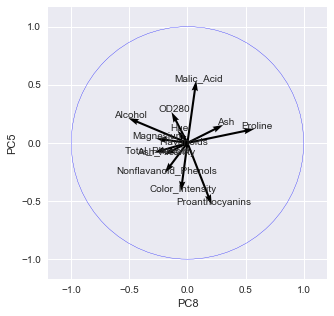

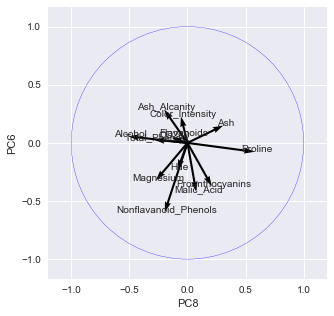

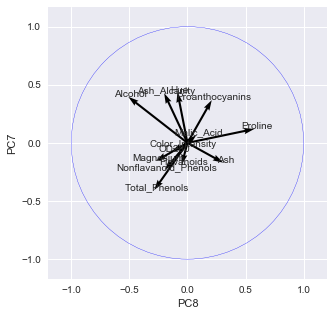

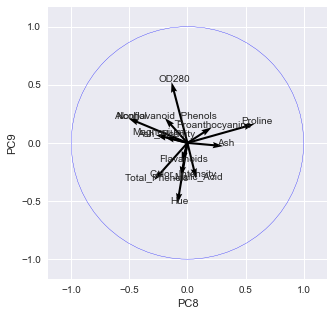

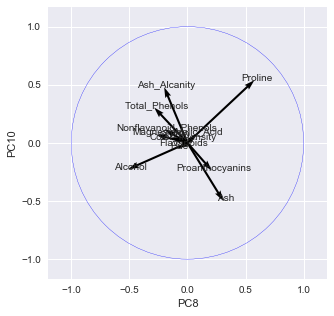

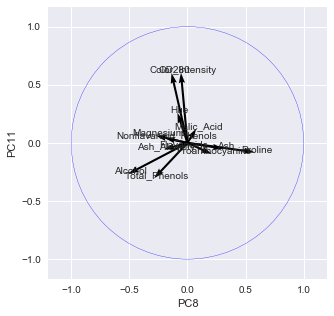

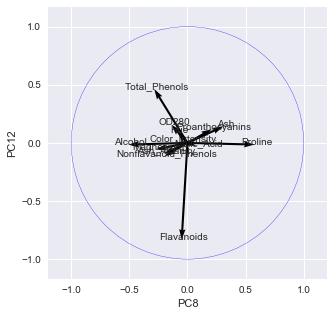

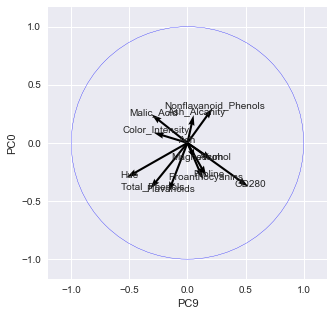

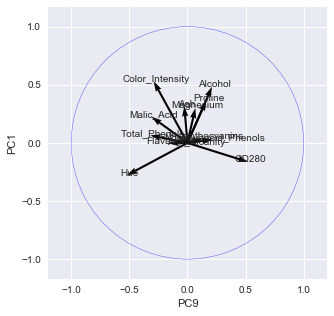

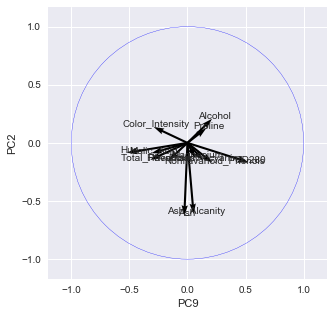

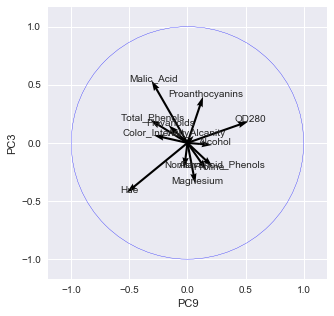

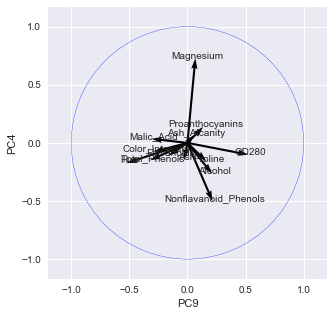

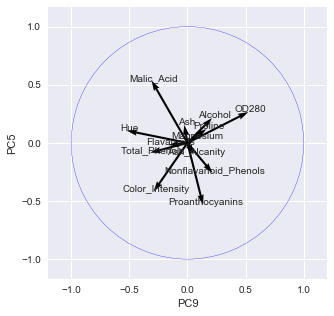

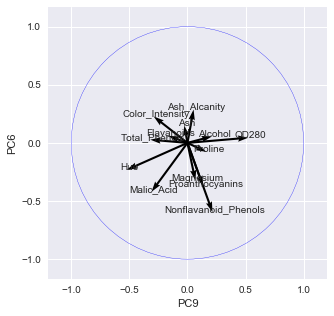

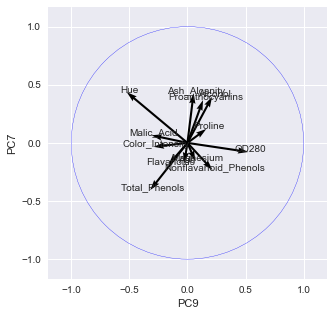

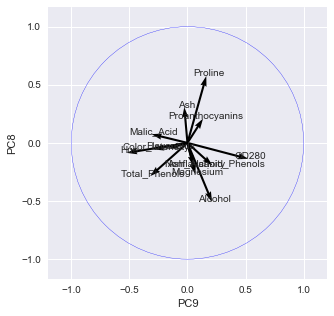

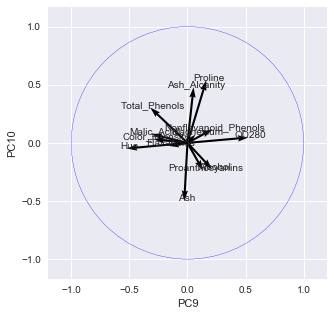

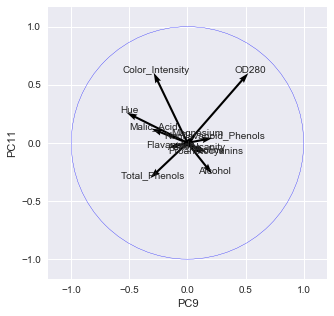

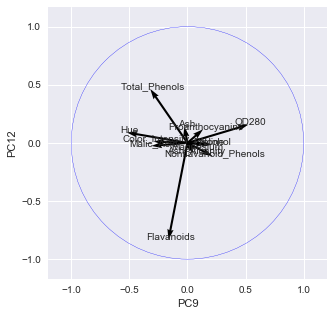

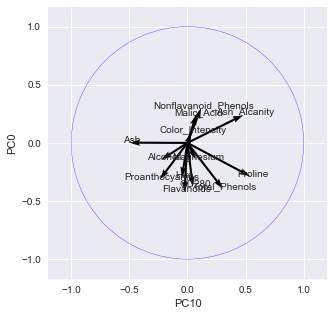

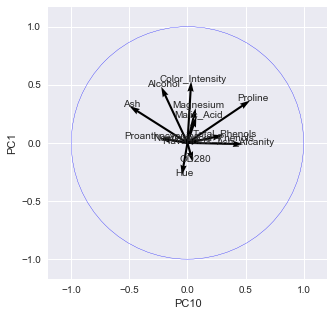

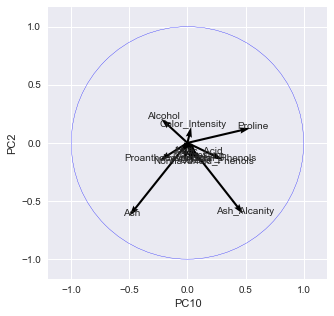

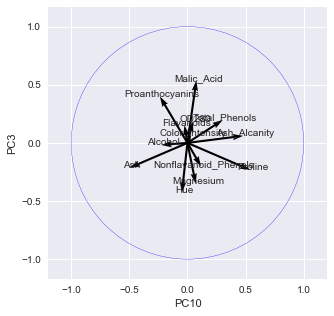

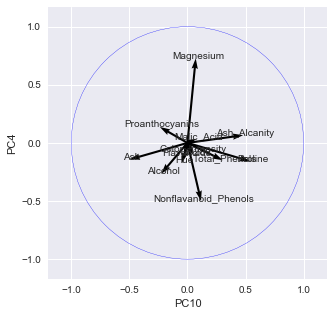

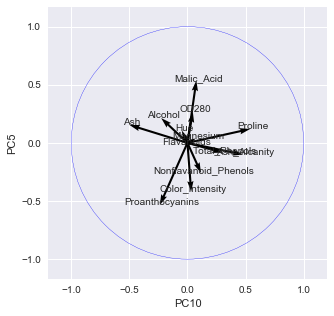

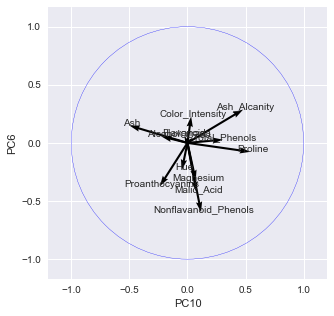

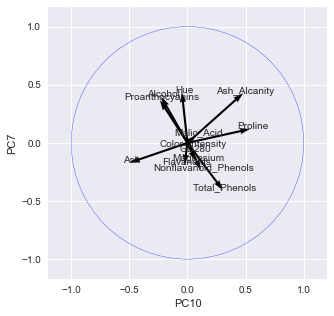

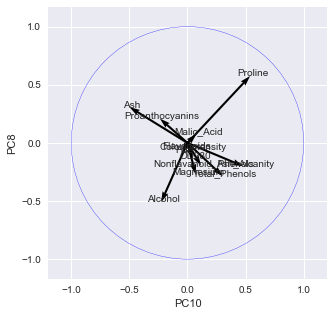

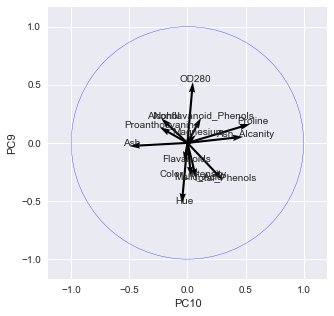

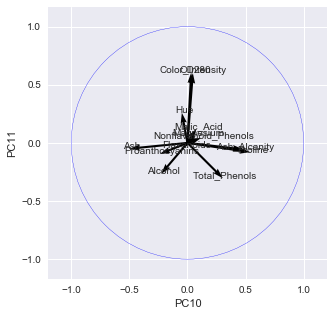

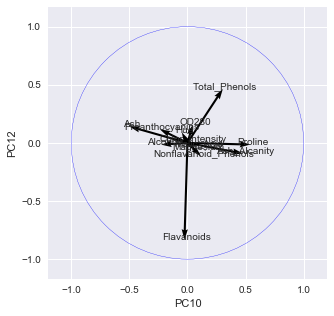

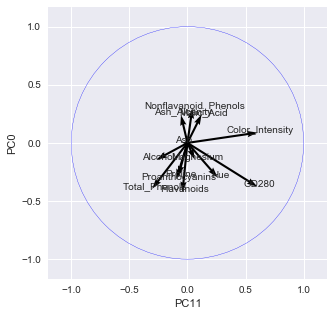

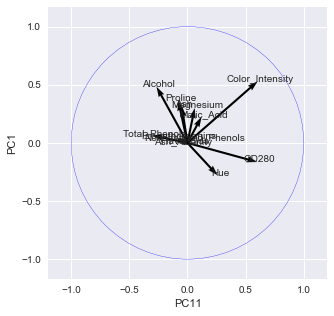

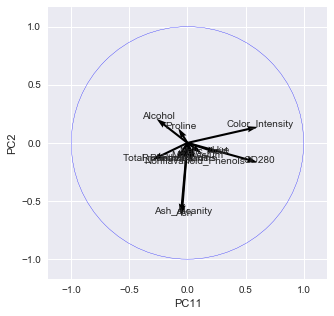

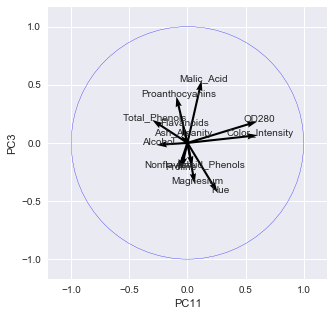

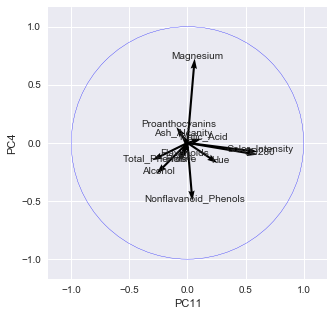

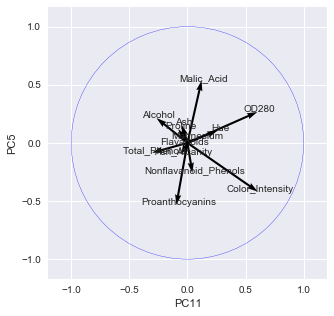

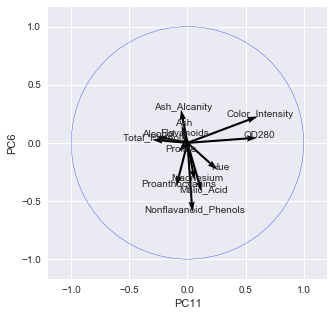

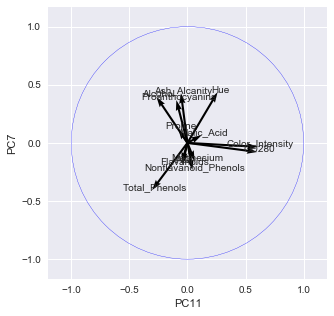

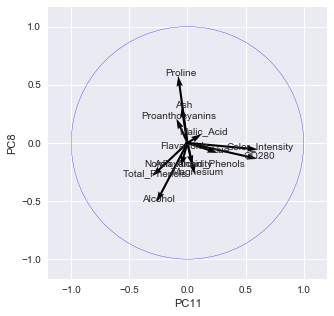

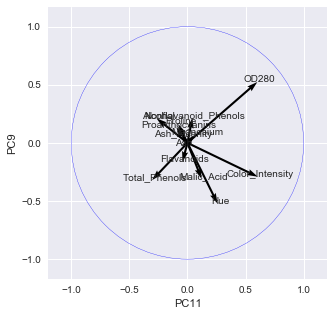

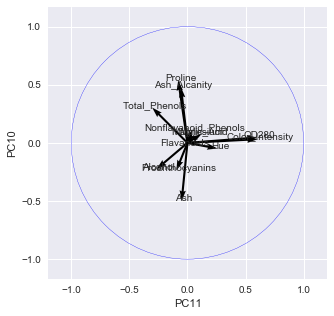

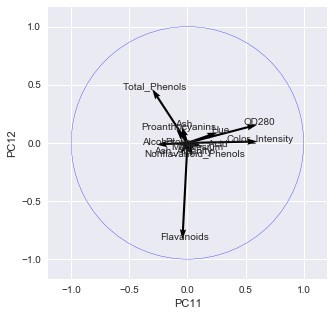

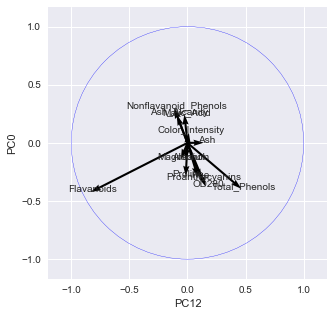

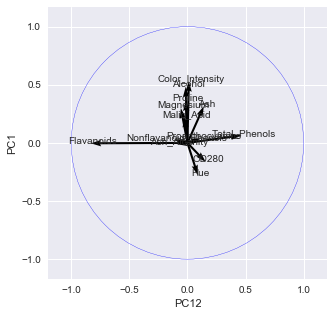

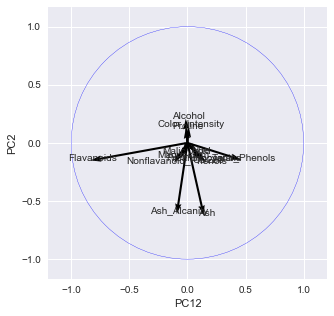

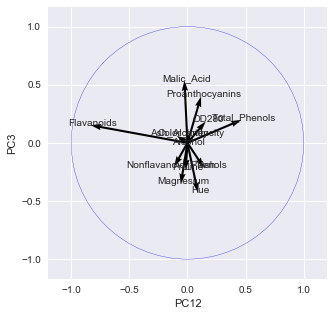

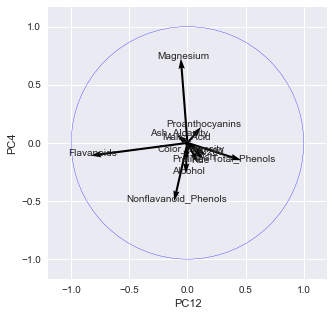

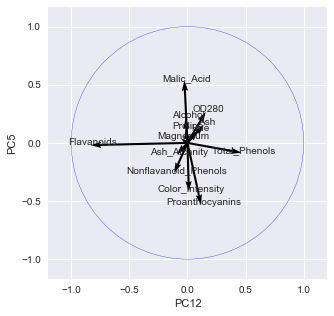

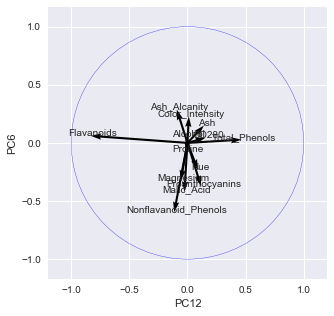

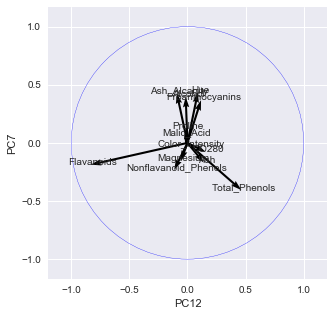

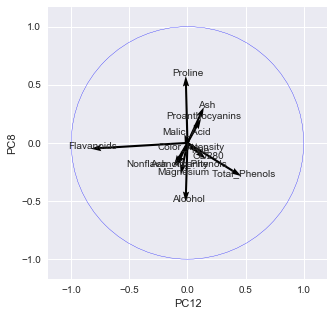

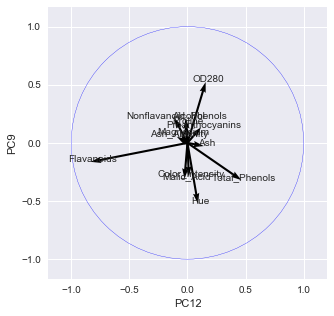

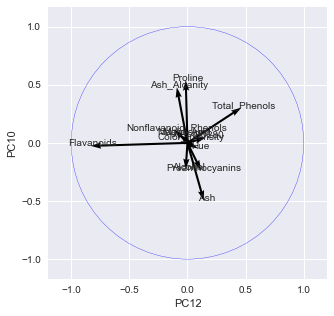

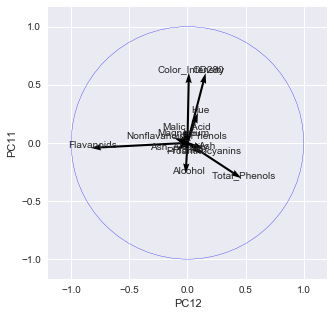

In [21]:
function(wine_properties)